In [7]:
import glob
import pandas as pd
import json
import requests

### Importing and Loading the datasets

In [8]:
df = pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


### Handling Null Values

In [9]:
df.shape

(37153, 11)

In [10]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

### MRT (Mass Rapid Transit System) Railway Transportation

In [11]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [12]:
list_of_mrt = [
    'Jurong East MRT Station',
    'Bukit Batok MRT Station',
    'Bukit Gombak MRT Station',
    'Choa Chu Kang MRT Station',
    'Yew Tee MRT Station',
    'Kranji MRT Station',
    'Marsiling MRT Station',
    'Woodlands MRT Station',
    'Admiralty MRT Station',
    'Sembawang MRT Station',
    'Canberra MRT Station',
    'Yishun MRT Station',
    'Khatib MRT Station',
    'Yio Chu Kang MRT Station',
    'Ang Mo Kio MRT Station',
    'Bishan MRT Station',
    'Braddell MRT Station',
    'Toa Payoh MRT Station',
    'Novena MRT Station',
    'Newton MRT Station',
    'Orchard MRT Station',
    'Somerset MRT Station',
    'Dhoby Ghaut MRT Station',
    'City Hall MRT Station',
    'Raffles Place MRT Station',
    'Marina Bay MRT Station',
    'Marina South Pier MRT Station',
    'Pasir Ris MRT Station',
    'Tampines MRT Station',
    'Simei MRT Station',
    'Tanah Merah MRT Station',
    'Bedok MRT Station',
    'Kembangan MRT Station',
    'Eunos MRT Station',
    'Paya Lebar MRT Station',
    'Aljunied MRT Station',
    'Kallang MRT Station',
    'Lavender MRT Station',
    'Bugis MRT Station',
    'Tanjong Pagar MRT Station',
    'Outram Park MRT Station',
    'Tiong Bahru MRT Station',
    'Redhill MRT Station',
    'Queenstown MRT Station',
    'Commonwealth MRT Station',
    'Buona Vista MRT Station',
    'Dover MRT Station',
    'Clementi MRT Station',
    'Chinese Garden MRT Station',
    'Lakeside MRT Station',
    'Boon Lay MRT Station',
    'Pioneer MRT Station',
    'Joo Koon MRT Station',
    'Gul Circle MRT Station',
    'Tuas Crescent MRT Station',
    'Tuas West Road MRT Station',
    'Tuas Link MRT Station',
    'Expo MRT Station',
    'Changi Airport MRT Station',
    'HarbourFront MRT Station',
    'Chinatown MRT Station',
    'Clarke Quay MRT Station',
    'Little India MRT Station',
    'Farrer Park MRT Station',
    'Boon Keng MRT Station',
    'Potong Pasir MRT Station',
    'Woodleigh MRT Station',
    'Serangoon MRT Station',
    'Kovan MRT Station',
    'Hougang MRT Station',
    'Buangkok MRT Station',
    'Sengkang MRT Station',
    'Punggol MRT Station',
    'Bras Basah MRT Station',
    'Esplanade MRT Station',
    'Promenade MRT Station',
    'Nicoll Highway MRT Station',
    'Stadium MRT Station',
    'Mountbatten MRT Station',
    'Dakota MRT Station',
    'MacPherson MRT Station',
    'Tai Seng MRT Station',
    'Bartley MRT Station',
    'Lorong Chuan MRT Station',
    'Marymount MRT Station',
    'Caldecott MRT Station',
    'Botanic Gardens MRT Station',
    'Farrer Road MRT Station',
    'Holland Village MRT Station',
    'one-north MRT Station',
    'Kent Ridge MRT Station',
    'Haw Par Villa MRT Station',
    'Pasir Panjang MRT Station',
    'Labrador Park MRT Station',
    'Telok Blangah MRT Station',
    'Bayfront MRT Station',
    'Bukit Panjang MRT Station',
    'Cashew MRT Station',
    'Hillview MRT Station',
    'Beauty World MRT Station',
    'King Albert Park MRT Station',
    'Sixth Avenue MRT Station',
    'Tan Kah Kee MRT Station',
    'Stevens MRT Station',
    'Rochor MRT Station',
    'Downtown MRT Station',
    'Telok Ayer MRT Station',
    'Fort Canning MRT Station',
    'Bencoolen MRT Station',
    'Jalan Besar MRT Station',
    'Bendemeer MRT Station',
    'Geylang Bahru MRT Station',
    'Mattar MRT Station',
    'Ubi MRT Station',
    'Kaki Bukit MRT Station',
    'Bedok North MRT Station',
    'Bedok Reservoir MRT Station',
    'Tampines West MRT Station',
    'Tampines East MRT Station',
    'Upper Changi MRT Station',
    'Woodlands North MRT Station',
    'Woodlands South MRT Station'
]

In [17]:
mrt_lat = []
mrt_long = []

for i in range(0, len(list_of_mrt)):
    query_address = list_of_mrt[i]
    query_string = 'https://www.onemap.gov.sg/api/common/elastic/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y&pageNum=1'
    response = requests.request("GET", query_string)

    data_mrt=json.loads(response.content)

    if data_mrt['found'] != 0:
        mrt_lat.append(data_mrt["results"][0]["LATITUDE"])
        mrt_long.append(data_mrt["results"][0]["LONGITUDE"])

        print (str(query_address)+",Lat: "+data_mrt['results'][0]['LATITUDE'] +" Long: "+data_mrt['results'][0]['LONGITUDE'])

    else:
        mrt_lat.append('NotFound')
        mrt_lat.append('NotFound')
        print ("No Results")

Jurong East MRT Station,Lat: 1.33315281585758 Long: 103.742286332403
Bukit Batok MRT Station,Lat: 1.34903534800639 Long: 103.749526027989
Bukit Gombak MRT Station,Lat: 1.35871216207818 Long: 103.751883836125
Choa Chu Kang MRT Station,Lat: 1.38536316540225 Long: 103.744370779756
Yew Tee MRT Station,Lat: 1.39757979021386 Long: 103.747459490883
Kranji MRT Station,Lat: 1.42508698073648 Long: 103.762137459497
Marsiling MRT Station,Lat: 1.43252114855026 Long: 103.774074641403
Woodlands MRT Station,Lat: 1.43605761708128 Long: 103.787938777173
Admiralty MRT Station,Lat: 1.44058856161847 Long: 103.800990519771
Sembawang MRT Station,Lat: 1.44905082158502 Long: 103.820046140211
Canberra MRT Station,Lat: 1.44307664075699 Long: 103.829702590959
Yishun MRT Station,Lat: 1.42944308477331 Long: 103.835005047246
Khatib MRT Station,Lat: 1.41738337009565 Long: 103.832979908243
Yio Chu Kang MRT Station,Lat: 1.38149882492597 Long: 103.845170704861
Ang Mo Kio MRT Station,Lat: 1.36993284962264 Long: 103.84955

In [18]:
mrt_location = pd.DataFrame({
    'MRT': list_of_mrt,
    'latitude': mrt_lat,
    'longitude': mrt_long
})

### Getting coordinates of each HDB(Housing and Developing Board) Resale flat

In [19]:
df['address'] = df['block'] + " " + df['street_name']
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0,297 YISHUN ST 20
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0,838 YISHUN ST 81
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0,664 YISHUN AVE 4
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0,325 YISHUN CTRL


In [20]:
address_list = df['address'].unique()

Jurong East MRT Station, Lat: 1.33315281585758, Long: 103.742286332403
Bukit Batok MRT Station, Lat: 1.34903534800639, Long: 103.749526027989
Bukit Gombak MRT Station, Lat: 1.35871216207818, Long: 103.751883836125
Choa Chu Kang MRT Station, Lat: 1.38536316540225, Long: 103.744370779756
Yew Tee MRT Station, Lat: 1.39757979021386, Long: 103.747459490883
Kranji MRT Station, Lat: 1.42508698073648, Long: 103.762137459497
Marsiling MRT Station, Lat: 1.43252114855026, Long: 103.774074641403
Woodlands MRT Station, Lat: 1.43605761708128, Long: 103.787938777173
Admiralty MRT Station, Lat: 1.44058856161847, Long: 103.800990519771
Sembawang MRT Station, Lat: 1.44905082158502, Long: 103.820046140211
Canberra MRT Station, Lat: 1.44307664075699, Long: 103.829702590959
Yishun MRT Station, Lat: 1.42944308477331, Long: 103.835005047246
Khatib MRT Station, Lat: 1.41738337009565, Long: 103.832979908243
Yio Chu Kang MRT Station, Lat: 1.38149882492597, Long: 103.845170704861
Ang Mo Kio MRT Station, Lat: 1.3
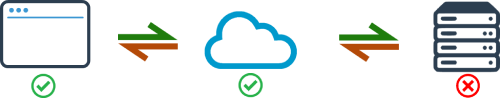

Cashew MRT Station, Lat: 1.36981544925552, Long: 103.76443921414
Hillview MRT Station, Lat: 1.36234486803558, Long: 103.767418254007
Beauty World MRT Station, Lat: 1.34090149001429, Long: 103.775746717778
King Albert Park MRT Station, Lat: 1.335893496278, Long: 103.783235863233
Sixth Avenue MRT Station, Lat: 1.33096058134451, Long: 103.796969279733
Tan Kah Kee MRT Station, Lat: 1.32639224146351, Long: 103.806548201692
Stevens MRT Station, Lat: 1.32006555750626, Long: 103.826024401924
Rochor MRT Station, Lat: 1.30385218527656, Long: 103.852769428884
Downtown MRT Station, Lat: 1.27944638178916, Long: 103.852840829581
Telok Ayer MRT Station, Lat: 1.28206894769394, Long: 103.848648781083
Fort Canning MRT Station, Lat: 1.29248194822996, Long: 103.844331362465
Bencoolen MRT Station, Lat: 1.29891843369422, Long: 103.850353762717
Jalan Besar MRT Station, Lat: 1.3051713878069, Long: 103.855295713435
Bendemeer MRT Station, Lat: 1.31367252847691, Long: 103.862977620945
Geylang Bahru MRT Station, 

In [23]:
latitude = []
longitude = []

for query_address in list_of_mrt:
    query_string = f"https://www.onemap.gov.sg/api/common/elastic/search?searchVal={query_address}&returnGeom=Y&getAddrDetails=Y&pageNum=1"
    response = requests.get(query_string)

    try:
        data_geo_location = response.json()  # This will raise an error if the content is not a valid JSON
        if data_geo_location['found'] != 0:
            latitude.append(data_geo_location['results'][0]['LATITUDE'])
            longitude.append(data_geo_location['results'][0]['LONGITUDE'])
            print(f"{query_address}, Lat: {latitude[-1]}, Long: {longitude[-1]}")
        else:
            latitude.append('NotFound')
            longitude.append('NotFound')
            print("No Results")
    except json.JSONDecodeError:
        # Handle the case where the response content is not a valid JSON
        print(f"Error decoding JSON for {query_address}. Response content: {response.text}")

In [35]:
# Example adjustment for blk_no
desired_length = 121
address_adjusted = address + [address[-1]] * (desired_length - len(address))


In [36]:
print(len(latitude), len(longitude), len(blk_no_adjusted), len(road_name_adjusted), len(postal_code_adjusted), len(address_adjusted))


121 121 121 121 121 121


In [38]:
df_coordinates = pd.DataFrame({
    'latitude': latitude,
    'longitude': longitude,
    'blk_no': blk_no_adjusted,
    'road_name': road_name_adjusted,
    'postal_code': postal_code_adjusted,
    'address': address_adjusted
})
len(df_coordinates)

121

In [39]:
list_of_lat = df_coordinates['latitude']
list_of_long = df_coordinates['longitude']
mrt_lat = mrt_location['latitude']
mrt_long = mrt_location['longitude']

In [40]:
list_of_coordinates = []
list_of_mrt_coordinates = []

for lat, long in zip(list_of_lat, list_of_long):
    list_of_coordinates.append((lat,long))
for lat, long in zip(mrt_lat, mrt_long):
    list_of_mrt_coordinates.append((lat, long))

### Getting the distance with the help of OpenMap API

In [42]:
!pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     -------------------------------------- 40.3/40.3 kB 640.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ------------------- -------------------- 61.4/125.4 kB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 92.2/125.4 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 921.6 kB/s eta 0:00:00


In [43]:
# Distance to nearest MRT
from geopy.distance import geodesic

list_of_dist_mrt = []
min_dist_mrt = []

for origin in list_of_coordinates:
    for destination in range(0, len(list_of_mrt_coordinates)):
        list_of_dist_mrt.append(geodesic(origin,list_of_mrt_coordinates[destination]).meters)
    shortest = (min(list_of_dist_mrt))
    min_dist_mrt.append(shortest)
    list_of_dist_mrt.clear()

In [44]:
# Distance from CDB
cbd_dist = []

for origin in list_of_coordinates:
    cbd_dist.append(geodesic(origin,(1.2830, 103.8513)).meters) #CBD coordinates

In [45]:
# Put MRT and CBD distance together
df_coordinates['cbd_dist'] = cbd_dist
df_coordinates['min_dist_mrt'] = min_dist_mrt

In [46]:
df_coordinates

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt
0,1.33315281585758,103.742286332403,174,ANG MO KIO AVENUE 4,560174,174 ANG MO KIO AVE 4,13339.584230,0.0
1,1.34903534800639,103.749526027989,541,ANG MO KIO AVENUE 10,560541,541 ANG MO KIO AVE 10,13476.114063,0.0
2,1.35871216207818,103.751883836125,163,ANG MO KIO AVENUE 4,560163,163 ANG MO KIO AVE 4,13874.471009,0.0
3,1.38536316540225,103.744370779756,446,ANG MO KIO AVENUE 10,560446,446 ANG MO KIO AVE 10,16423.381929,0.0
4,1.39757979021386,103.747459490883,557,ANG MO KIO AVENUE 10,560557,557 ANG MO KIO AVE 10,17148.431435,0.0
...,...,...,...,...,...,...,...,...
116,1.3456336579777,103.938492495285,428,ANG MO KIO AVENUE 3,560428,428 ANG MO KIO AVE 3,11921.701868,0.0
117,1.35619148271544,103.9546344625,428,ANG MO KIO AVENUE 3,560428,428 ANG MO KIO AVE 3,14062.410416,0.0
118,1.34173977444995,103.961472788634,428,ANG MO KIO AVENUE 3,560428,428 ANG MO KIO AVE 3,13875.282778,0.0
119,1.44778217342648,103.7851355073,428,ANG MO KIO AVENUE 3,560428,428 ANG MO KIO AVE 3,19652.354474,0.0


In [47]:
df_coordinates.to_csv('df_coordinates.csv',index=False)

In [48]:
df_coordinates = pd.read_csv('df_coordinates.csv')

In [49]:
df_new = df_coordinates.merge(df, on="address", how='outer')
df_new

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1.333153,103.742286,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,13339.58423,0.0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,1.333153,103.742286,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,13339.58423,0.0,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,69,275000.0
2,1.333153,103.742286,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,13339.58423,0.0,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,68,310000.0
3,1.333153,103.742286,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,13339.58423,0.0,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,68,253000.0
4,1.333153,103.742286,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,13339.58423,0.0,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,68,290000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37610,NaN,NaN,NaN,NaN,NaN,634 WOODLANDS RING RD,NaN,NaN,2016-12,WOODLANDS,4 ROOM,634,WOODLANDS RING RD,01 TO 03,102.0,Model A,1999,81,355000.0
37611,NaN,NaN,NaN,NaN,NaN,810 WOODLANDS ST 81,NaN,NaN,2016-12,WOODLANDS,4 ROOM,810,WOODLANDS ST 81,04 TO 06,106.0,Model A,1995,77,348000.0
37612,NaN,NaN,NaN,NaN,NaN,844 YISHUN ST 81,NaN,NaN,2016-12,YISHUN,4 ROOM,844,YISHUN ST 81,10 TO 12,104.0,Model A,1988,71,435000.0
37613,NaN,NaN,NaN,NaN,NaN,654 YISHUN AVE 4,NaN,NaN,2016-12,YISHUN,5 ROOM,654,YISHUN AVE 4,04 TO 06,134.0,Model A,1992,74,515000.0


In [50]:
df_new['resale_price'] = df_new['resale_price'].astype('float')
df_new['floor_area_sqm'] = df_new['floor_area_sqm'].astype('float')
df_new['lease_commence_date'] = df_new['lease_commence_date'].astype('int64')
df_new['lease_remain_years'] = 99 - (2023 - df_new['lease_commence_date'])

df_new.dropna(inplace=True)


In [51]:
df_new

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years
0,1.333153,103.742286,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,13339.584230,0.0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,62
1,1.333153,103.742286,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,13339.584230,0.0,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,69,275000.0,62
2,1.333153,103.742286,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,13339.584230,0.0,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,68,310000.0,62
3,1.333153,103.742286,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,13339.584230,0.0,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,68,253000.0,62
4,1.333153,103.742286,174.0,ANG MO KIO AVENUE 4,560174.0,174 ANG MO KIO AVE 4,13339.584230,0.0,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,68,290000.0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,1.427488,103.792730,428.0,ANG MO KIO AVENUE 3,560428.0,428 ANG MO KIO AVE 3,17255.243341,0.0,2015-02,ANG MO KIO,4 ROOM,428,ANG MO KIO AVE 3,04 TO 06,92.0,New Generation,1978,62,485000.0,54
774,1.427488,103.792730,428.0,ANG MO KIO AVENUE 3,560428.0,428 ANG MO KIO AVE 3,17255.243341,0.0,2015-07,ANG MO KIO,4 ROOM,428,ANG MO KIO AVE 3,01 TO 03,92.0,New Generation,1978,62,411000.0,54
775,1.427488,103.792730,428.0,ANG MO KIO AVENUE 3,560428.0,428 ANG MO KIO AVE 3,17255.243341,0.0,2015-08,ANG MO KIO,4 ROOM,428,ANG MO KIO AVE 3,07 TO 09,92.0,New Generation,1978,62,477000.0,54
776,1.427488,103.792730,428.0,ANG MO KIO AVENUE 3,560428.0,428 ANG MO KIO AVE 3,17255.243341,0.0,2016-10,ANG MO KIO,4 ROOM,428,ANG MO KIO AVE 3,10 TO 12,92.0,New Generation,1978,61,490000.0,54


### Final Combined Data

In [52]:
df_new.to_csv('combined.csv', index = False)

In [54]:
mrt_location.to_csv("MRT.csv",index=False)